In [1]:
import pandas as pd 
import numpy as np


In [2]:
df= pd.read_csv('sample.csv')

In [3]:
df.head()

,Unnamed: 0,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,0,3.89,23.0,4.18,0.6,2.508,2.50,0.2,0.500,6.68,...,0.4,0.5,1.7148,1.0,2.0,2.0,2.0,0.0,2.0,2.0
1,1,3.89,6.0,0.00,0.2,0.000,4.83,0.2,0.966,4.83,...,0.4,0.5,0.5108,0.0,2.0,2.0,2.0,0.0,2.0,2.0
2,2,3.89,6.0,0.51,0.2,0.102,0.23,0.2,0.046,0.74,...,0.4,0.5,0.3096,0.0,2.0,2.0,2.0,0.0,2.0,2.0
3,3,3.89,6.0,0.00,0.2,0.000,10.80,0.6,6.480,10.80,...,0.4,0.5,3.5060,1.0,6.0,6.0,2.0,0.0,2.0,2.0
4,4,3.89,6.0,0.00,0.2,0.000,0.08,0.2,0.016,0.08,...,0.4,0.5,0.2832,0.0,2.0,2.0,2.0,0.0,2.0,2.0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23.0,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0.5,1.7148,1.0,2.0,2.0,2.0,0.0,2.0,2.0
1,3.89,6.0,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0.5,0.5108,0.0,2.0,2.0,2.0,0.0,2.0,2.0
2,3.89,6.0,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0.5,0.3096,0.0,2.0,2.0,2.0,0.0,2.0,2.0
3,3.89,6.0,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0.5,3.5060,1.0,6.0,6.0,2.0,0.0,2.0,2.0
4,3.89,6.0,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0.5,0.2832,0.0,2.0,2.0,2.0,0.0,2.0,2.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
# Assuming 'Risk' is the target variable for prediction
X = df.drop('Risk', axis=1)  # Features
y = df['Risk']  # Target

In [8]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(608, 31)
(152, 31)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [11]:
rf = RandomForestClassifier(random_state=4)
svc = SVC(random_state=4)
lr = LogisticRegression(random_state=4)

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
lr_acc=accuracy_score(y_test,y_pred1)
print(lr_acc)

0.9605263157894737


In [13]:
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)
svc_acc=accuracy_score(y_test,y_pred2)
print(svc_acc)

0.9539473684210527


In [14]:
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)
rf_acc=accuracy_score(y_test,y_pred4)
print(rf_acc)

1.0


In [15]:
report_table_1 =  ['Logistic Regression',
                                lr.score(X_train, y_train), lr.score(X_test, y_test),lr_acc]
report_table_2 =  ['SVC',
                                svc.score(X_train, y_train), svc.score(X_test, y_test),svc_acc]
report_table_3 =  ['Random Forest',
                                rf.score(X_train, y_train), rf.score(X_test, y_test),rf_acc]

In [16]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,))).transpose()

In [17]:
report_table.columns = ['Model Name','Training Score', 'Testing Score','Prediction  Score']
report_table.index = report_table['Model Name']
report_table.head(10)

,Model Name,Training Score,Testing Score,Prediction Score
Model Name,,,,
Logistic Regression,Logistic Regression,0.965461,0.960526,0.960526
SVC,SVC,0.96875,0.953947,0.953947
Random Forest,Random Forest,1.0,1.0,1.0


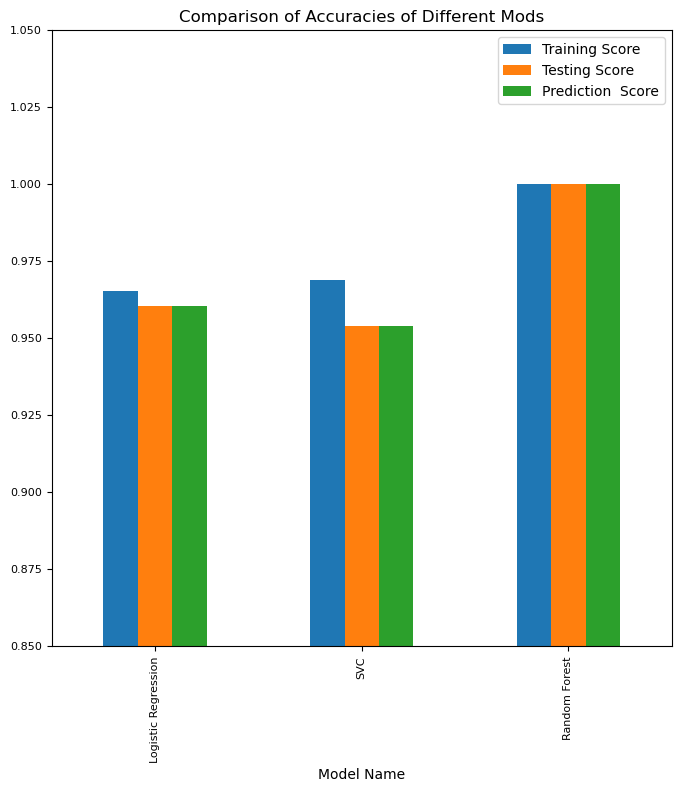

In [47]:
import matplotlib.pyplot as plt

ax = report_table[['Training Score','Testing Score','Prediction  Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Mods", figsize=(8,8), fontsize = 8)
ax.set_ylim((0.85, 1.05))
plt.show()